<a href="https://colab.research.google.com/github/VimalChamyal/Linear-Regression/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the essential libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data from my github repo

In [140]:
url = "https://raw.githubusercontent.com/VimalChamyal/Linear-Regression/main/house_price.csv"
df1 = pd.read_csv(url)

In [141]:
df1.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,living_room_size,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201 sqm,177,3,1,Small,1,1,No,3.3,1,10,0,6.8,0.90,0,165432
1,196 sqm,182,4,3,Large,1,0,Yes,1.2,1,11,0,4.1,1.42,1,187043
2,198 sqm,182,4,4,Large,1,0,Yes,5.9,0,20,0,2.1,4.12,1,148658
3,178 sqm,166,2,3,Small,1,0,No,5.9,0,5,0,0.7,4.36,0,123785
4,183 sqm,165,3,1,Large,1,0,No,3.8,1,8,0,0.7,0.42,0,156470


In [92]:
df1.columns

Index(['land_size_sqm', 'house_size_sqm', 'no_of_rooms', 'no_of_bathrooms',
       'living_room_size', 'parking_space', 'front_garden', 'swimming_pool',
       'distance_to_school', 'wall_fence', 'house_age', 'water_front',
       'distance_to_supermarket_km', 'crime_rate_index', 'room_size',
       'property_value'],
      dtype='object')

In [93]:
df1.info()
# It is important for us to convert the object dtype to numeric dtype for the ease of implementation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   object 
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   object 
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   object 
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

In [94]:
df1.describe()
# Columns with numerical values will only be summarized

,house_size_sqm,no_of_rooms,no_of_bathrooms,parking_space,front_garden,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,231.250908,3.788252,3.199839,0.763827,0.627574,3.454219,0.630400,11.444691,0.048648,3.508639,2.986110,1.738393,201974.738999
std,94.571642,1.585371,1.602300,0.424772,0.483500,2.007358,0.482745,6.356991,0.215152,1.991266,1.737742,0.941126,90031.882219
min,85.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,1.000000,0.000000,0.100000,0.010000,0.000000,32622.000000
25%,165.000000,3.000000,2.000000,1.000000,0.000000,1.700000,0.000000,6.000000,0.000000,1.800000,1.470000,1.000000,136777.000000
50%,217.500000,4.000000,3.000000,1.000000,1.000000,3.400000,1.000000,11.000000,0.000000,3.500000,3.020000,2.000000,194515.500000
75%,274.000000,5.000000,4.000000,1.000000,1.000000,5.200000,1.000000,17.000000,0.000000,5.300000,4.490000,2.000000,246590.000000
max,760.000000,8.000000,9.000000,1.000000,1.000000,6.900000,1.000000,22.000000,1.000000,6.900000,5.990000,3.000000,692086.000000


In [95]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
house_size_sqm,4954.0,231.250908,94.571642,85.00,165.00,217.50,274.00,760.00
no_of_rooms,4954.0,3.788252,1.585371,1.00,3.00,4.00,5.00,8.00
no_of_bathrooms,4954.0,3.199839,1.602300,1.00,2.00,3.00,4.00,9.00
parking_space,4954.0,0.763827,0.424772,0.00,1.00,1.00,1.00,1.00
front_garden,4954.0,0.627574,0.483500,0.00,0.00,1.00,1.00,1.00
distance_to_school,4954.0,3.454219,2.007358,0.10,1.70,3.40,5.20,6.90
wall_fence,4954.0,0.630400,0.482745,0.00,0.00,1.00,1.00,1.00
house_age,4954.0,11.444691,6.356991,1.00,6.00,11.00,17.00,22.00
water_front,4954.0,0.048648,0.215152,0.00,0.00,0.00,0.00,1.00
distance_to_supermarket_km,4954.0,3.508639,1.991266,0.10,1.80,3.50,5.30,6.90


Checking the correlations between the features

In [96]:
df1.corr()

,house_size_sqm,no_of_rooms,no_of_bathrooms,parking_space,front_garden,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
house_size_sqm,1.000000,0.894753,0.677722,0.384615,0.500914,-0.010658,0.445266,0.008198,0.018977,0.001966,0.008044,0.322504,0.964163
no_of_rooms,0.894753,1.000000,0.710043,0.493262,0.603783,-0.006162,0.547999,0.003455,0.026654,-0.007287,0.014644,0.363811,0.912155
no_of_bathrooms,0.677722,0.710043,1.000000,0.330699,0.419505,-0.008322,0.365661,0.000966,0.021575,-0.002535,0.010655,0.258000,0.686525
parking_space,0.384615,0.493262,0.330699,1.000000,0.368903,0.025226,0.314644,-0.001848,0.017491,-0.016110,-0.007465,0.202987,0.459860
front_garden,0.500914,0.603783,0.419505,0.368903,1.000000,-0.008106,0.362512,0.005548,0.028637,-0.012637,-0.009018,0.235309,0.543363
distance_to_school,-0.010658,-0.006162,-0.008322,0.025226,-0.008106,1.000000,-0.021986,0.011519,-0.013448,0.010095,-0.002084,-0.015233,-0.072357
wall_fence,0.445266,0.547999,0.365661,0.314644,0.362512,-0.021986,1.000000,0.011068,0.023470,0.001915,0.014697,0.199975,0.530090
house_age,0.008198,0.003455,0.000966,-0.001848,0.005548,0.011519,0.011068,1.000000,0.002780,-0.002793,-0.000667,-0.013758,-0.037958
water_front,0.018977,0.026654,0.021575,0.017491,0.028637,-0.013448,0.023470,0.002780,1.000000,0.013628,-0.039184,0.016998,0.095613
distance_to_supermarket_km,0.001966,-0.007287,-0.002535,-0.016110,-0.012637,0.010095,0.001915,-0.002793,0.013628,1.000000,0.018026,-0.005850,-0.028634


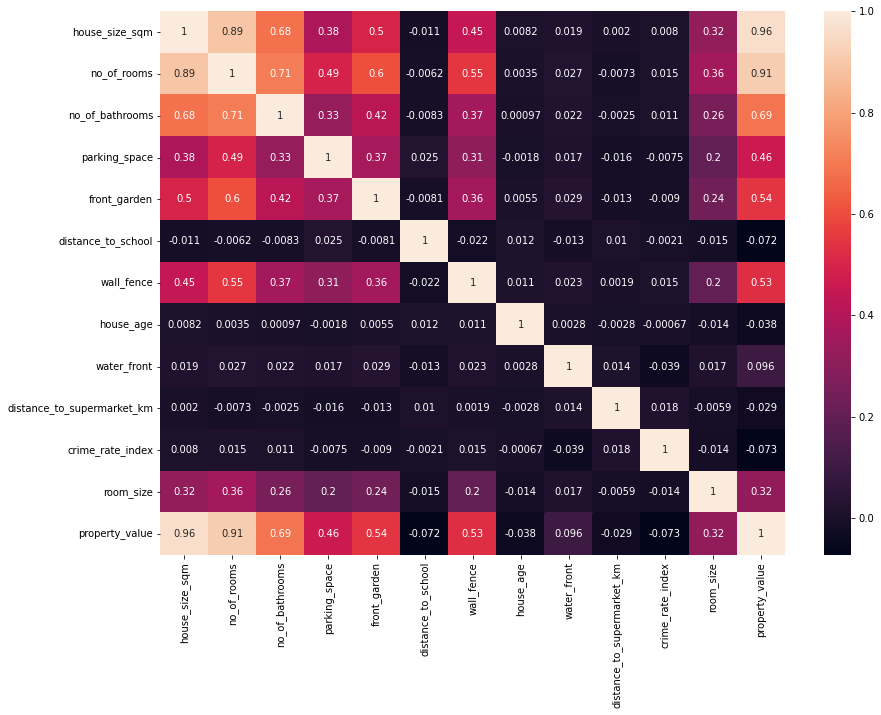

In [97]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


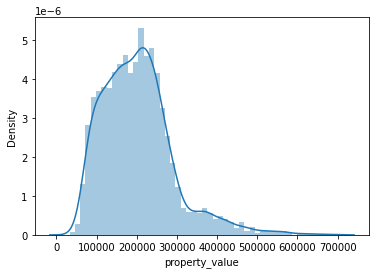

In [98]:
sns.distplot(df1['property_value'])

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   object 
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   object 
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   object 
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

In [100]:
df1['land_size_sqm']

0       201 sqm
1       196 sqm
2       198 sqm
3       178 sqm
4       183 sqm
         ...   
4949    297 sqm
4950    302 sqm
4951    153 sqm
4952    180 sqm
4953    695 sqm
Name: land_size_sqm, Length: 4954, dtype: object

Data Preprocessing | We are trying to remove the space and 'sqm' from our land_size_sqm column data
We can do this 2 ways
1. Creating a normal user defined function
2. Creating a lambda function

In [101]:
df1['land_size_sqm'][0][:-4]
# We have to neglect the last 4 characters which include the space and also the string 'sqm'

'201'

In [102]:
# For applying this to all we can go with this approach or by lamda function
def land_size(x):
  return x[:-4]

In [103]:
df1['land_size_sqm'].apply(land_size)

0       201
1       196
2       198
3       178
4       183
       ... 
4949    297
4950    302
4951    153
4952    180
4953    695
Name: land_size_sqm, Length: 4954, dtype: object

In [104]:
# By lambda function
df1['land_size_sqm'] = df1['land_size_sqm'].apply(lambda x: int(x[:-4]))

In [105]:
df1['land_size_sqm']

0       201
1       196
2       198
3       178
4       183
       ... 
4949    297
4950    302
4951    153
4952    180
4953    695
Name: land_size_sqm, Length: 4954, dtype: int64

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   object 
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   object 
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

Data preprocessing | We will convert the object dtype to numerical (for the categorical data)

In [107]:
df1['swimming_pool'].unique()

array(['No', 'Yes'], dtype=object)

In [108]:
df1['swimming_pool'].apply(lambda x: 1 if x =='Yes' else 0)

0       0
1       1
2       1
3       0
4       0
       ..
4949    1
4950    1
4951    0
4952    1
4953    1
Name: swimming_pool, Length: 4954, dtype: int64

In [109]:
df1['swimming_pool'] = df1['swimming_pool'].apply(lambda x: 1 if x =='Yes' else 0)

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   object 
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   int64  
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

In [111]:
df1['living_room_size'].unique()
# We can check the unique values here, doing this for assigning small to 0 and large `1

array(['Small', 'Large'], dtype=object)

In [112]:
df1['living_room_size'] = df1['living_room_size'].apply(lambda x: 0 if x=='Small' else 1)

In [113]:
df1['living_room_size']

0       0
1       1
2       1
3       0
4       1
       ..
4949    1
4950    1
4951    1
4952    0
4953    1
Name: living_room_size, Length: 4954, dtype: int64

In [114]:
df1.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,living_room_size,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0,165432
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1,187043
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1,148658
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0,123785
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0,156470


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   int64  
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   int64  
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

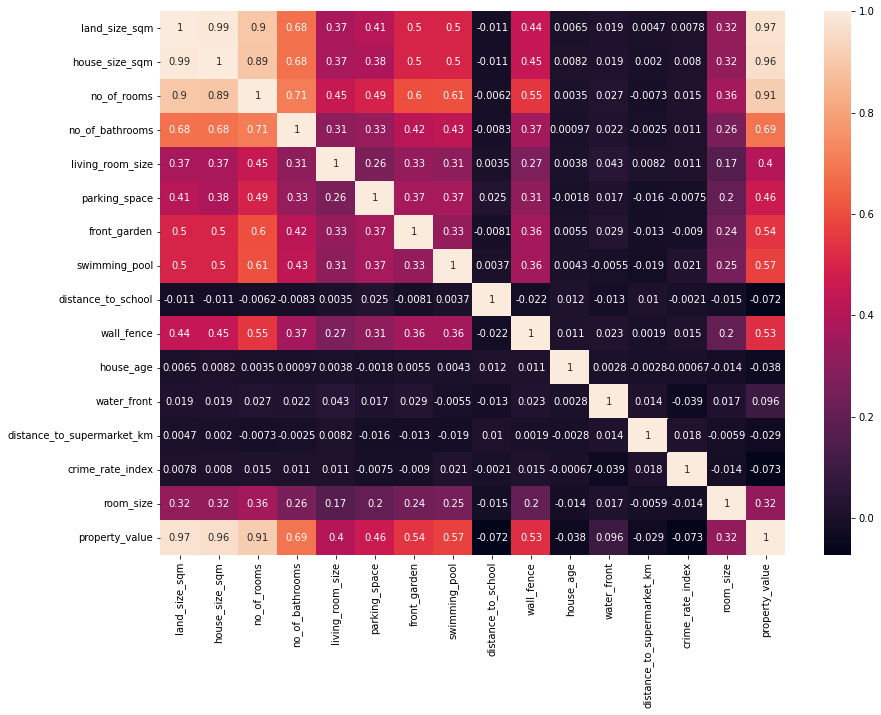

In [116]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(), annot = True)

In [117]:
df1.columns

Index(['land_size_sqm', 'house_size_sqm', 'no_of_rooms', 'no_of_bathrooms',
       'living_room_size', 'parking_space', 'front_garden', 'swimming_pool',
       'distance_to_school', 'wall_fence', 'house_age', 'water_front',
       'distance_to_supermarket_km', 'crime_rate_index', 'room_size',
       'property_value'],
      dtype='object')

Splitting the dependent and independent features

In [118]:
X = df1.drop(['property_value'], axis = 1)

In [119]:
y = df1['property_value']

In [120]:
X.shape

(4954, 15)

In [121]:
y.head()

0    165432
1    187043
2    148658
3    123785
4    156470
Name: property_value, dtype: int64

Test train split

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.2)

In [123]:
X_train.shape

(3963, 15)

In [124]:
X_test.shape

(991, 15)

Scaling the data 

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
mscalar = MinMaxScaler()

In [127]:
mscalar.fit(X_train)

MinMaxScaler()

In [128]:
X_train_scaled = mscalar.transform(X_train)

In [129]:
X_train_scaled

array([[0.19252874, 0.19325153, 0.42857143, ..., 0.45588235, 0.06020067,
        0.66666667],
       [0.23706897, 0.23773006, 0.57142857, ..., 0.55882353, 0.37123746,
        0.33333333],
       [0.11063218, 0.12116564, 0.28571429, ..., 0.07352941, 0.7993311 ,
        0.66666667],
       ...,
       [0.09051724, 0.11809816, 0.14285714, ..., 0.82352941, 0.46655518,
        0.66666667],
       [0.22413793, 0.25920245, 0.42857143, ..., 0.08823529, 0.20735786,
        1.        ],
       [0.17097701, 0.16257669, 0.42857143, ..., 0.08823529, 0.93979933,
        1.        ]])

In [130]:
X_test_scaled = mscalar.transform(X_test)
X_test_scaled

array([[0.06034483, 0.06288344, 0.        , ..., 0.35294118, 0.67056856,
        1.        ],
       [0.25431034, 0.27760736, 0.42857143, ..., 0.26470588, 0.82274247,
        0.66666667],
       [0.44827586, 0.45398773, 0.71428571, ..., 1.        , 0.79431438,
        0.33333333],
       ...,
       [0.05172414, 0.05674847, 0.        , ..., 0.35294118, 0.91304348,
        0.33333333],
       [0.1566092 , 0.17484663, 0.28571429, ..., 0.14705882, 0.36120401,
        0.66666667],
       [0.15517241, 0.18558282, 0.28571429, ..., 0.67647059, 0.87625418,
        0.66666667]])

Creating and training the model

In [131]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [132]:
model.fit(X_train_scaled, y_train)

LinearRegression()

Checking out the prediction

In [133]:
prediction = model.predict(X_test_scaled)

In [134]:
prediction [0]

91295.73090515585

In [135]:
np_y_test = np.array(y_test)
np_y_test[0]

92117

Performance metrics

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [137]:
print('Mean Absolute Error : ', mean_absolute_error(np_y_test, prediction))
print('Mean Squared Error  : ', mean_squared_error(np_y_test, prediction))
print('RMSE                : ', np.sqrt(mean_squared_error(np_y_test, prediction)))

Mean Absolute Error :  7296.3802295875075
Mean Squared Error  :  97466825.81455497
RMSE                :  9872.52884597229


In [138]:
index_position = 0

np_y_test = np.array(y_test)
actual = np_y_test[index_position]
pred = round(prediction[index_position], 2)
diff = round(actual - pred, 2)
perc = round (diff/actual *100, 2)
print('Actual     : ' + str(actual))
print('Prediction : ' + str(pred))
print('Error      : ' + str(diff))
print('Error %    : ' + str(perc) + '%')

Actual     : 92117
Prediction : 91295.73
Error      : 821.27
Error %    : 0.89%
